<a href="https://colab.research.google.com/github/svishnupriya1999/Machine-learning-Supervised/blob/main/STROKE_knn%2Cnaivebayes%2Csvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES AND DATASET
----

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#last 5 rows
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


DROP COLUMNS
---

In [ ]:
#drop columns
df=df.drop('id',axis=1)
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


MISSING VALUES
---

In [ ]:
#missing values
df.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#mean
x=df['bmi'].mean()
x

28.893236911794666

FILL bmi MISSING VALUE WITH bmi MEAN
----

In [ ]:
#fill bmi missing value with bmi mean
df['bmi'].fillna(x,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


ENCODING DONE USING LABELENCODER
---

In [ ]:
#encoding done using labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


SPLITTING X AND Y
---

In [ ]:
#spliting x and y
x=df.iloc[:,:-1].values
x

array([[  1.        ,  67.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,  61.        ,   0.        , ..., 202.21      ,
         28.89323691,   2.        ],
       [  1.        ,  80.        ,   0.        , ..., 105.92      ,
         32.5       ,   2.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 0, 0, 0])

SPLITTING DATA INTO TRAINING AND TESTING
----

In [ ]:
#spliting data into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  1.  ,   4.  ,   0.  , ...,  90.42,  16.2 ,   0.  ],
       [  1.  ,  29.  ,   0.  , ..., 207.58,  22.8 ,   3.  ],
       [  1.  ,  44.  ,   1.  , ...,  91.28,  26.5 ,   2.  ],
       ...,
       [  0.  ,   1.16,   0.  , ...,  97.28,  17.8 ,   0.  ],
       [  1.  ,  80.  ,   0.  , ..., 196.08,  31.  ,   1.  ],
       [  0.  ,  46.  ,   0.  , ..., 100.15,  50.3 ,   3.  ]])

In [ ]:
x_test

array([[ 1.  , 31.  ,  0.  , ..., 64.85, 23.  ,  0.  ],
       [ 1.  , 40.  ,  0.  , ..., 65.29, 28.3 ,  2.  ],
       [ 0.  ,  8.  ,  0.  , ..., 74.42, 22.5 ,  0.  ],
       ...,
       [ 1.  , 42.  ,  0.  , ..., 93.79, 27.2 ,  2.  ],
       [ 0.  , 57.  ,  0.  , ..., 69.4 , 24.  ,  0.  ],
       [ 0.  , 60.  ,  0.  , ..., 73.04, 25.3 ,  2.  ]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
        -1.65003512, -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
        -0.79238754,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
        -0.31158512,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
        -1.44212056, -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.27317459, -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         2.78114402,  1.52066342]])

In [ ]:
x_test

array([[ 1.19722611, -0.52525515, -0.35433129, ..., -0.91790892,
        -0.76383152, -1.25992122],
       [ 1.19722611, -0.13106694, -0.35433129, ..., -0.9083549 ,
        -0.0756488 ,  0.58131732],
       [-0.83078232, -1.53262504, -0.35433129, ..., -0.710109  ,
        -0.82875442, -1.25992122],
       ...,
       [ 1.19722611, -0.04346956, -0.35433129, ..., -0.28951502,
        -0.21847918,  0.58131732],
       [-0.83078232,  0.6135108 , -0.35433129, ..., -0.81911167,
        -0.63398573, -1.25992122],
       [-0.83078232,  0.74490687, -0.35433129, ..., -0.74007388,
        -0.46518619,  0.58131732]])

MODEL CREATION
-----

In [ ]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
model1=KNeighborsClassifier(n_neighbors=7)
model2=GaussianNB()
model3=SVC()
models=[model1,model2,model3]



PERFORMANCE EVALUATION
---

KNeighborsClassifier(n_neighbors=7)
confusion matrix
[[1441    3]
 [  89    0]]
****************************************************************************************************
0.9399869536855838
****************************************************************************************************
classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533

****************************************************************************************************
GaussianNB()
confusion matrix
[[1309  135]
 [  55   34]]
****************************************************************************************************
0.8760600130463144
************************************************************************

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


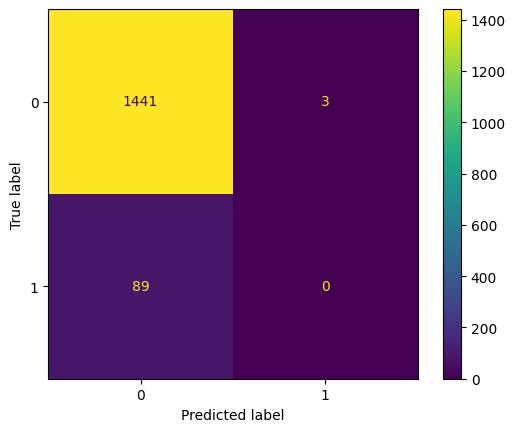

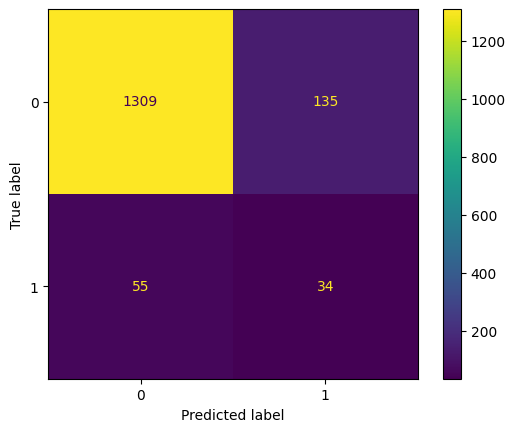

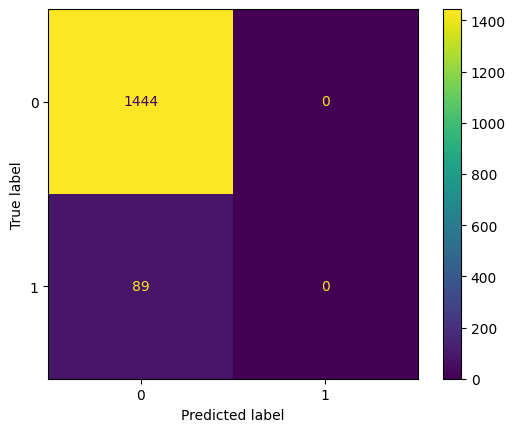

In [ ]:
#performance evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print("confusion matrix")
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print("*"*100)
  score=accuracy_score(y_test,y_pred)
  print(score)
  print("*"*100)
  print("classification_report")
  print(classification_report(y_test,y_pred))
  print("*"*100)
  cmd=ConfusionMatrixDisplay(result)
  cmd.plot()

